In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as aT


## visualize sample data

Sample Rate: 44100
Shape: (1, 68839)
Dtype: torch.float32
 - Max:     0.683
 - Min:     -0.749
 - Mean:    -2.52e-06
 - Std dev: 0.0948
Waveform: tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.0518e-05, 6.1035e-05,
         6.1035e-05]])


Text(0.5, 1.0, 'Normalized Waveform')

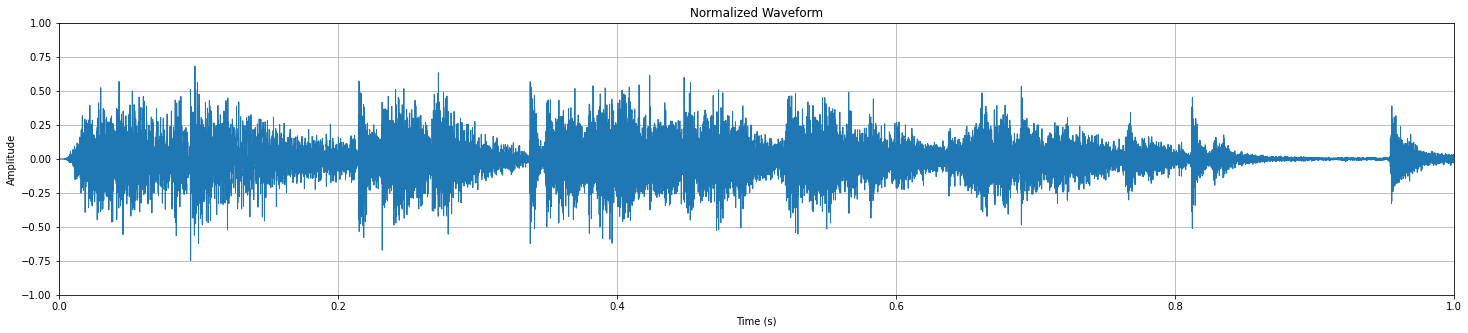

In [15]:
waveform, sample_rate = torchaudio.load('./dataset/5/147867.wav')
downsample_rate=16000

print("Sample Rate:", sample_rate)
print("Shape:", tuple(waveform.shape))
print("Dtype:", waveform.dtype)
print(f" - Max:     {waveform.max():.3g}")
print(f" - Min:     {waveform.min():.3g}")
print(f" - Mean:    {waveform.mean():.3g}")
print(f" - Std dev: {waveform.std():.3g}")
print("Waveform:", waveform)

figure = plt.figure(figsize=(25, 5))
time_axis = torch.arange(0, len(waveform[0])) / sample_rate
plt.plot(time_axis, waveform[0], linewidth=1)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.title("Normalized Waveform")


torch.Size([320, 126])


C:\Python39\lib\site-packages\torchaudio\functional\functional.py:432: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (320) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


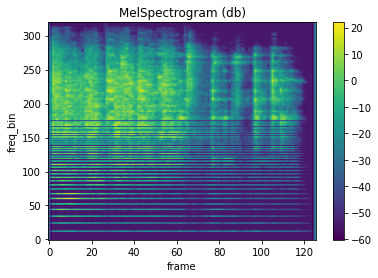

In [17]:
transforms = nn.Sequential(
    aT.MelSpectrogram(sample_rate=44100, n_mels=320),
    aT.AmplitudeToDB(top_db=80.0),
    aT.Resample(orig_freq=sample_rate, new_freq=downsample_rate),
)

spec = transforms(waveform[0])
print(spec.shape)

plt.imshow(spec, origin='lower', aspect='auto')
plt.title('MelSpectrogram (db)')
plt.ylabel('freq_bin')
plt.xlabel('frame')
plt.colorbar()
